Importing required modules

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

/Users/tanishkhot/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
IMAGE_SIZE = 640
BATCH_SIZE = 16
CHANNELS = 3
EPOCHS = 50

In [3]:
#data pipeline
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "SampleDS/Training-Set",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 25349 files belonging to 8 classes.


In [4]:
def partition_dataset(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
  if shuffle:
    ds=ds.shuffle(shuffle_size, seed = 12)

  ds_size = len(ds)
  train_size = int(train_split*ds_size)
  val_size = int(val_split*ds_size)

  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)
  return train_ds, val_ds, test_ds


In [5]:
train_ds, val_ds, test_ds = partition_dataset(dataset)

In [6]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [7]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256, 256),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [8]:
'''data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.3),
])'''

'data_augmentation = tf.keras.Sequential([\n    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),\n    layers.experimental.preprocessing.RandomRotation(0.3),\n])'

In [9]:
input_shape = (BATCH_SIZE, 256, 256, CHANNELS)

model = models.Sequential([
    resize_and_rescale,
    #data_augmentation,

    layers.Conv2D(32, (3, 3), activation="relu", input_shape = input_shape),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(8, activation='softmax')
])

model.build(input_shape=input_shape)

In [10]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [11]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs = EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1
)

Epoch 1/50


2024-03-13 17:31:16.482798: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:7: Filling up shuffle buffer (this may take a while): 72 of 10000
2024-03-13 17:31:36.396096: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:7: Filling up shuffle buffer (this may take a while): 210 of 10000
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
2024-03-13 17:31:56.392969: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:7: Filling up shuffle buffer (this may take a while): 375 of 10000
2024-03-13 17:32:06.397330: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:7: Filling up shuffle buffer (this may take a while): 451 of 10000


: 

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training And Validation Loss')

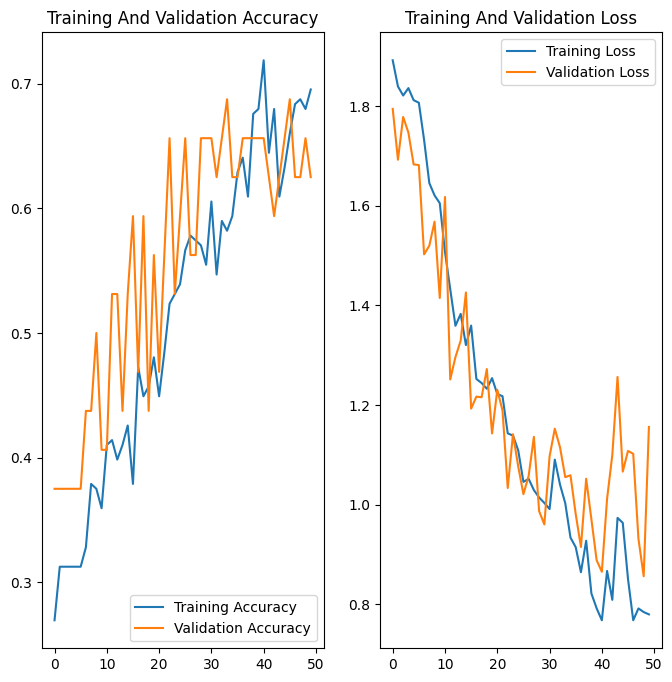

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training And Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training And Validation Loss')


In [ ]:
model.save('my_model.h5')
model.save('my_model.h5')


/Users/tanishkhot/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
